In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

### Load our data
Python's Pandas offers a great way to quickly read in our data**

In [1]:
import pandas as pd
df = pd.read_csv("../input/PS_20174392719_1491204439457_log.csv")

### Explore
Once the data is in a DataFrame we can use different built-in functions to explore the data. <br/>
Let's start with the df.info() method that will print the number of rows, types of columns and their data type****s

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


It can sometimes be useuful to explore the correlation matrix. The correlation matrix will show us how and if different features correlate to each other. 
A value closer to 1 indicates a high-degree of correlation

In [3]:
print(df.corr())

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
old

### Plot
We use use matplotplib to get a good overview of our data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d47602b00>,
      dtype=object)

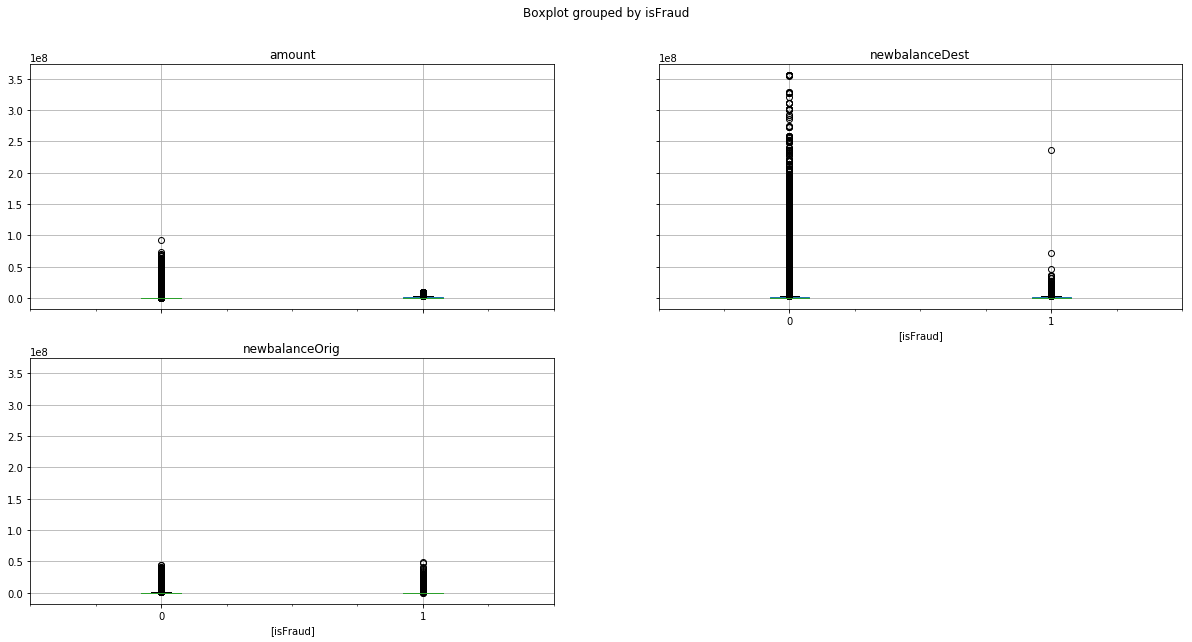

In [4]:
import matplotlib.pyplot as plt

columns_to_plot = df[['amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud']] 
columns_to_plot.boxplot(figsize=(20,10), by='isFraud')

Finally, let's look at how balanced the dataset is (number of fraudulent transactions vs non-fraudulent). 

In [6]:
print(df.groupby('isFraud')['step'].count())

isFraud
0    6354407
1       8213
Name: step, dtype: int64
